**Course website**: http://www.leouieda.com/geofisica1

**Note**: This notebook is part of the course "Geofísica 1" of Geology program of the 
[Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Esse documento que você está usando é um [Jupyter notebook](http://jupyter.org/). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (números, texto, figuras, videos, etc).

# Prática 2 - Gravimetria - A Terra Normal e o distúrbio da gravidade

## Objetivos

* Aprender a calcular a gravidade da Terra Normal e o distúrbio da gravidade
* Gerar mapas do distúrbio para o mundo todo
* Entender a relação entre o distúrbio e a isostasia
* Observar o estado de equilíbrio isostático em diferentes regiões do planeta

## Instruções

O notebook te fornecerá exemplos interativos que trabalham os temas abordados no questionário. Utilize esses exemplos para responder as perguntas.

As células com números ao lado, como `In [1]:`, são código [Python](http://python.org/). Algumas dessas células não produzem resultado e servem de preparação para os exemplos interativos. Outras, produzem gráficos interativos. **Você deve executar todas as células, uma de cada vez**, mesmo as que não produzem gráficos.

Para executar uma célula, clique em cima dela e aperte `Shift + Enter`. O foco (contorno verde ou cinza em torno da célula) deverá passar para a célula abaixo. Para rodá-la, aperte `Shift + Enter` novamente e assim por diante. Você pode executar células de texto que não acontecerá nada.

## Preparação

Exectute as células abaixo para carregar as componentes necessárias para nossa prática. Vamos utilizar várias *bibliotecas*, inclusive uma de geofísica chamada [Fatiando a Terra](http://www.fatiando.org).

In [2]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import ipywidgets as widgets
from IPython.display import display
import seaborn
import fatiando
from icgem import load_icgem_gdf

In [3]:
print("Usando a versão do Fatiando: {}".format(fatiando.__version__))

Usando a versão do Fatiando: f284f789c74fc8696f61ab17380773e3ca9ad55d


## A Terra Normal

"Terra Normal" é o nome que damos ao elipsóide de referência utilizado para o cálculo de anomalias da gravidade. Um elipsóide geralmente utilizado é o [WGS84](http://en.wikipedia.org/wiki/World_Geodetic_System). 

Existem fórmulas para calcular a gravidade (lembre-se que gravidade = gravitação + centrífuga) de um elipsóide em qualquer ponto fora dele. Porém, essas fórmulas são mais complicadas do que queremos para essa aula. Uma alternativa é utilizar a fórmula de  Somigliana:

$$
\gamma(\varphi) = \frac{a \gamma_a \cos^2 \varphi + b \gamma_b \sin^2 \varphi}{\sqrt{a^2 \cos^2 \varphi + b^2 \sin^2 \varphi}}
$$

$\gamma$ é a gravidade do elipsóide calculada na latitude $\varphi$ e **sobre a superfície do elipsóide** (ou seja, altitude zero).
$a$ e $b$ são os eixos maior e menor do elipsóide, $\gamma_a$ e $\gamma_b$ são a gravidade do elipsóide no equador e nos polos. Os valores de $a$, $b$, $\gamma_a$ e $\gamma_b$ são tabelados para cada elipsóide. Os valores abaixo são referentes ao WGS84:

<table>
<tr> <th> a </th> <td> 6378137 </td> <td> metros </td> </tr>
<tr> <th> a </th> <td> 6356752.3142 </td> <td> metros </td> </tr>
<tr> <th> $\gamma_a$ </th> <td> 9.7803253359 </td> <td> m/s² </td> </tr>
<tr> <th> $\gamma_b$ </th> <td> 9.8321849378 </td> <td> m/s² </td> </tr>
</table>

Os valores foram retirados do livro:

> Hofmann-Wellenhof, B., and H. Moritz (2006), Physical Geodesy, 2nd, corr. ed. 2006 edition., Springer, Wien ; New York.

### Calculando $\gamma$ em uma planilha

Hoje vamos calcular o valor de $gamma$ utilizando a fórmula de Somigliana em uma planilha. Vamos utilizar o programa LibreOffice Calc (uma versão livre do Microsoft Excel).

![Screnshot do Calc](https://raw.githubusercontent.com/leouieda/geofisica1/master/images/calc-screen-shot.jpg)

**Primeiro**: vocês vão precisar abrir o arquivo com os dados utilizados na [prática passada](http://nbviewer.ipython.org/github/leouieda/geofisica1/blob/master/praticas/1-mapas-interpolacao-gravidade.ipynb) no Calc. Esses arquivos estão em um arquivo de texto chamado `eigen-6c3stat-0_5-mundo.gdf` na [pasta `data`](https://github.com/leouieda/geofisica1/tree/master/data) (peça ajuda para localizar o arquivo no seu computador). **Abra esse arquivo e examine seu conteúdo**.

Para abrir o arquivo no Calc, selecione File > Open e navegue até o arquivo. Abrirá uma janela de configuração de importação de texto (Text Import). Nessa janela:

* Informem que os valores no arquivo estão separados por espaços
* Escolha a opção "Merge delimiters"
* Verifique que os valores estão separados corretamente
* Dê "OK" para abrir os dados

**Segundo**: Não vamos editar os dados nesse arquivo diretamente para não perder os dados originais.

* Crie uma nova planilha em branco
* Copie os dados para essa nova planilha
* Salve-a na pasta `data` com o nome `disturbio-mundo-{nome do aluno}.ods`, substituindo seu nome (**sem espaços e sem acentos**)
* Feche a planilha com os dados originais para não ter problemas
* Coloque o nome de cada coluna acima dos valores

**Terceiro**: Calcule os valores de $\gamma$ para cada ponto do dado. 

**Quarto**: Salve uma cópia da sua planilha no formato Comma Separated Values (`.cvs`) para podermos carregá-los no notebook.

**Dicas**: 

* Para calcular o seno do valor em uma célula (por exemplo, a A2), utilize a fórmula `=sin(A2)`
* O seno espera valores em **radianos**
* Para calcular a raiz quadrada utilize a função `sqrt`
* Utilizando os valores da tabela acima nos dará $\gamma$ em m/s². Precisamos dos valores em mGal = 100000 m/s²
* Não deixe colunas vazias a esquerda dos dados
* Utilize quantas colunas quiser para guardar valores intermediários. Porém, garanta que a **última coluna são os valores de $\gamma$**

### Carregando os dados e fazendo um mapa

Depois de calcular os valores acima, precisamos carregá-los aqui no notebook para gerarmos os mapas.

Primeiro, coloque o nome do seu arquivo `.cvs` abaixo e execute a célula.

In [ ]:
arquivo_dados = '../data/disturbio-mundo-{nome do aluno}.csv'

Agora, execute as células abaixo para carregar os dados e gerar um mapa com os valores que você calculou.

In [8]:
lon, lat, gamma = np.loadtxt(arquivo_dados, delimiter=',', unpack=True, skiprows=1, usecols=[0, 1, -1])

In [9]:
bm = Basemap(projection='moll', lon_0=0, resolution='c')
x, y = bm(lon, lat)

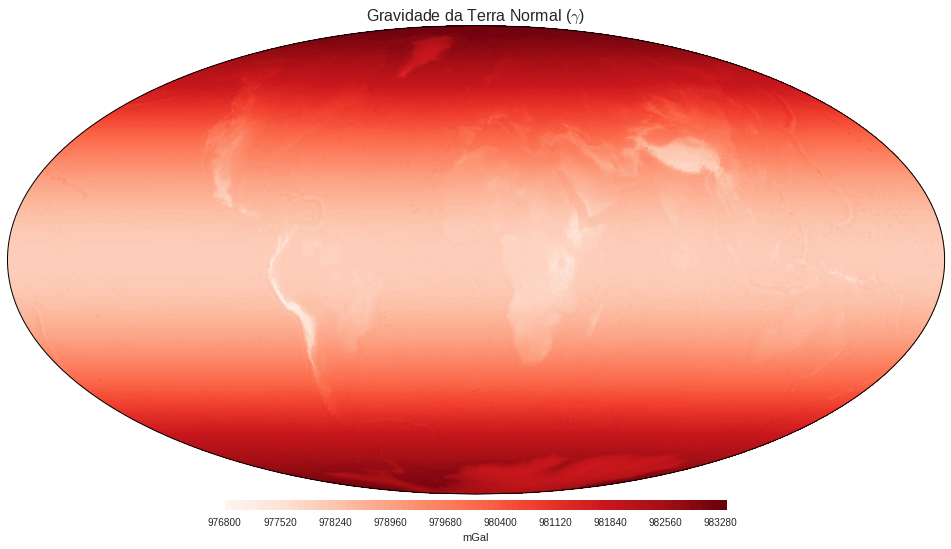

In [12]:
plt.figure(figsize=(18, 10))
tmp = bm.contourf(x, y, gamma, 100, tri=True, cmap='Reds')
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, shrink=0.5).set_label('mGal')
plt.title(r"Gravidade da Terra Normal ($\gamma$)", fontsize=16)

### Cáculo da Terra Normal no ponto de observação ($\gamma_P$)

A fórmula de Somgliana nos dá a gravidade da Terra Normal calculada sobre o elipsóide. Nós precisamos de $\gamma$ calculado no ponto onde medimos a gravidade (P) para calcular o distúrbio. Para obter $\gamma_P$, nós podemos utilizar a **correção de ar-livre**. Essa correção nos dá uma approximação de $\gamma_P$:

$$ \gamma_P \approx \gamma - 0.3086 H $$

em que $H$ é a altitude em relação ao elipsóide (altitude geométrica) em **metros**. Lembrando que a correção é feita em **mGal**.

**Calcule $\gamma_P$ em sua planilha** (a mesma que antes). Certifique-se que os valores de $gamma_P$ estão na última coluna. Após calcular, **salve novamente como CVS** (sobreescreva o arquivo anterior).

Rode as células abaixo para carregar os dados de $\gamma_P$ e gerar um mapa.

In [13]:
gamma_p = np.loadtxt(arquivo_dados, delimiter=',', unpack=True, skiprows=1, usecols=[-1])

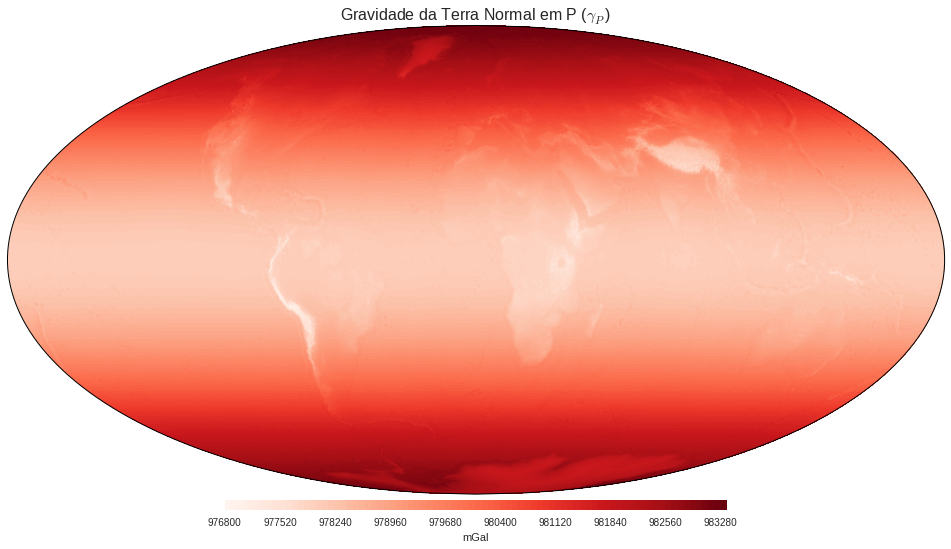

In [14]:
plt.figure(figsize=(18, 10))
tmp = bm.contourf(x, y, gamma_p, 100, tri=True, cmap='Reds')
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, shrink=0.5).set_label('mGal')
plt.title(r"Gravidade da Terra Normal em P ($\gamma_P$)", fontsize=16)

[]()